In [25]:
import datetime
import pandas as pd
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [9]:
df = pd.read_csv('C:/專題/SIX_CITY_V2.csv',encoding='UTF-8',header=0,index_col=False);df.head()

,WHOLE_DATE,WHOLE_TIME,ACCIDENT_TYPE,ADMIN_UNIT,CITY,ACCIDENT_ADDR,WEATHER,LIGHT,ROAD_TYPE_MAIN,SPEED_LIMIT,...,OBJ_CDN_SUB,CRASH_MAIN,CRASH_SUB,CRASH_OTHER_MAIN,CRASH_OTHER_SUB,CAUSE_MAIN_DETAIL,CAUSE_SUB_DETAIL,HAR,LONGITUDE,LATITUDE
0,2018-01-01,15:00:00,A1,桃園市政府警察局,桃園市,桃園市蘆竹區大竹北路418號前00公尺北側,晴,日間自然光線,市區道路,50.0,...,NaN,NaN,NaN,NaN,NaN,無(非車輛駕駛人因素),尚未發現肇事因素,否,121.244920,25.036777
1,2018-01-01,15:00:00,A1,桃園市政府警察局,桃園市,桃園市蘆竹區大竹北路418號前00公尺北側,晴,日間自然光線,市區道路,50.0,...,向前直行中,機車,左側車身,NaN,NaN,駕駛人,未注意車前狀態,否,121.244920,25.036777
2,2018-01-02,11:00:00,A1,桃園市政府警察局,桃園市,桃園市中壢區中豐路北側 桃園市中壢區永嘉街,晴,日間自然光線,市區道路,50.0,...,左轉彎,汽車,右前車頭(身),NaN,NaN,駕駛人,違反特定標誌(線)禁制,是,121.219521,24.959527
3,2018-01-02,11:00:00,A1,桃園市政府警察局,桃園市,桃園市中壢區中豐路北側 桃園市中壢區永嘉街,晴,日間自然光線,市區道路,50.0,...,其他,其他,非汽(機)車,NaN,NaN,無(非車輛駕駛人因素),尚未發現肇事因素,否,121.219521,24.959527
4,2018-01-02,11:00:00,A1,桃園市政府警察局,桃園市,桃園市中壢區中豐路北側 桃園市中壢區永嘉街,晴,日間自然光線,市區道路,50.0,...,向前直行中,機車,前車頭,NaN,NaN,無(車輛駕駛人因素),尚未發現肇事因素,否,121.219521,24.959527


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2877365 entries, 0 to 2877364
Data columns (total 51 columns):
 #   Column              Dtype  
---  ------              -----  
 0   WHOLE_DATE          object 
 1   WHOLE_TIME          object 
 2   ACCIDENT_TYPE       object 
 3   ADMIN_UNIT          object 
 4   CITY                object 
 5   ACCIDENT_ADDR       object 
 6   WEATHER             object 
 7   LIGHT               object 
 8   ROAD_TYPE_MAIN      object 
 9   SPEED_LIMIT         float64
 10  ROAD_TYPE_SUB1      object 
 11  ROAD_TYPE_SUB2      object 
 12  LOCATION_MAIN       object 
 13  LOCATION_SUB        object 
 14  PAVE_MTL            object 
 15  PAVE_CDN            object 
 16  PAVE_FLAW           object 
 17  BAR                 object 
 18  BAR_QUA             object 
 19  BAR_VIS             object 
 20  SIGNAL_TYPE         object 
 21  SIGNAL_CDN          object 
 22  LANE_MAIN           object 
 23  LANE_SUB            object 
 24  LANE_LINE           obje

In [19]:
df.pivot_table(index=['CITY', 'ACCIDENT_TYPE'], values='ACCIDENT_DEAD', 
                    margins=True, aggfunc=['count'], margins_name= 'Total count')

count
                          ACCIDENT_DEAD
CITY        ACCIDENT_TYPE              
新北市         A1                     2093
            A2                   502349
桃園市         A1                     2219
            A2                   527918
臺中市         A1                     2458
            A2                   546790
臺北市         A1                     1102
            A2                   297510
臺南市         A1                     2287
            A2                   493154
高雄市         A1                     2444
            A2                   497041
Total count                     2877365

In [22]:
df.isnull().sum()

WHOLE_DATE            0
WHOLE_TIME            0
ACCIDENT_TYPE         0
ADMIN_UNIT            0
CITY                  0
ACCIDENT_ADDR         0
WEATHER               0
LIGHT                 0
ROAD_TYPE_MAIN        0
SPEED_LIMIT           0
ROAD_TYPE_SUB1        0
ROAD_TYPE_SUB2        0
LOCATION_MAIN         0
LOCATION_SUB          0
PAVE_MTL              0
PAVE_CDN              0
PAVE_FLAW             0
BAR                   0
BAR_QUA               0
BAR_VIS               0
SIGNAL_TYPE           0
SIGNAL_CDN            0
LANE_MAIN             0
LANE_SUB              0
LANE_LINE             0
LANE_LINE_SPEED       0
LANE_LINE_EDGE        0
ACCIDENT_OBJ          0
ACCIDENT_CASE         0
CAUSE_MAIN            0
CAUSE_SUB             0
ACCIDENT_DEAD         0
ACCIDENT_INJURY       0
ACCIDENT_OBJ_ORDER    0
VEHICLE_MAIN          0
VEHICLE_SUB           0
OBJ_GENDER            0
OBJ_AGE               0
PROTECTION            0
C_PDT_USAGE           0
OBJ_CDN_MAIN          0
OBJ_CDN_SUB     

In [21]:
df.dropna(inplace = True)

# 描述性統計 

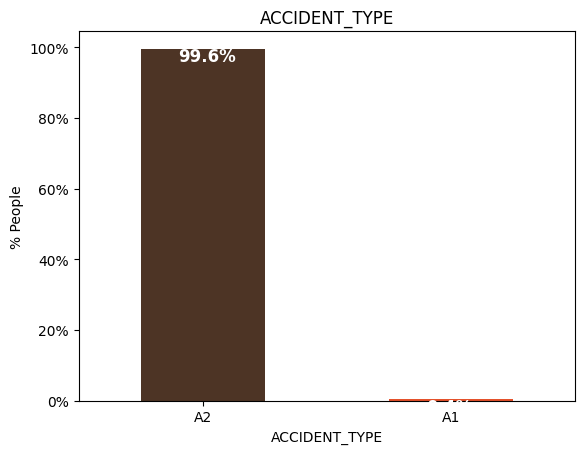

In [26]:
colors = ['#4D3425','#E4512B']
ax = (df['ACCIDENT_TYPE'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% People')
ax.set_xlabel('ACCIDENT_TYPE')
ax.set_ylabel('% People')
ax.set_title('ACCIDENT_TYPE')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

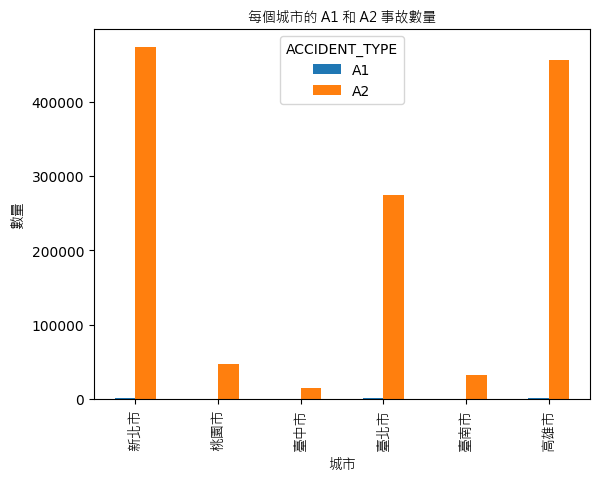

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 設定中文字體路徑
font_path = 'C:/專題/微軟正黑體-1.ttf'  # 替換為中文字體的路徑

# 設定中文字體
font_prop = font_manager.FontProperties(fname=font_path)

# 使用 groupby 計算每個城市的 A1 和 A2 的數量
city_counts = df.groupby(['CITY', 'ACCIDENT_TYPE']).size().unstack(fill_value=0)

# 繪製長條圖
fig, ax = plt.subplots()
city_counts.plot(kind='bar', ax=ax)

# 設定圖表標題和軸標籤
ax.set_title('每個城市的 A1 和 A2 事故數量', fontproperties=font_prop)
ax.set_xlabel('城市', fontproperties=font_prop)
ax.set_ylabel('數量', fontproperties=font_prop)

# 設定 X 軸刻度標籤為中文
ax.set_xticklabels(city_counts.index, fontproperties=font_prop)

# 顯示圖表
plt.show()

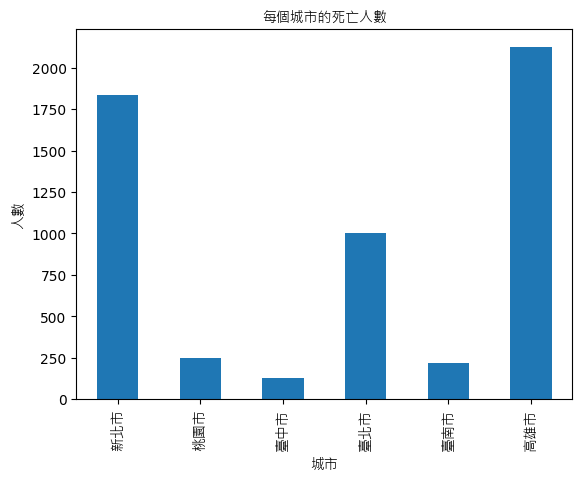

In [39]:
import matplotlib.pyplot as plt


# 設定中文字體路徑
font_path = 'C:/專題/微軟正黑體-1.ttf'  # 替換為中文字體的路徑

# 設定中文字體
font_prop = font_manager.FontProperties(fname=font_path)

# 使用 groupby 計算每個城市的死亡與受傷人數
city_counts = df.groupby('CITY')['ACCIDENT_DEAD'].sum()

# 繪製長條圖
fig, ax = plt.subplots()
city_counts.plot(kind='bar', ax=ax)

# 設定圖表標題和軸標籤
ax.set_title('每個城市的死亡人數', fontproperties=font_prop)
ax.set_xlabel('城市', fontproperties=font_prop)
ax.set_ylabel('人數', fontproperties=font_prop)

# 設定 X 軸刻度標籤為中文
ax.set_xticklabels(city_counts.index, fontproperties=font_prop)

# 顯示圖表
plt.show()


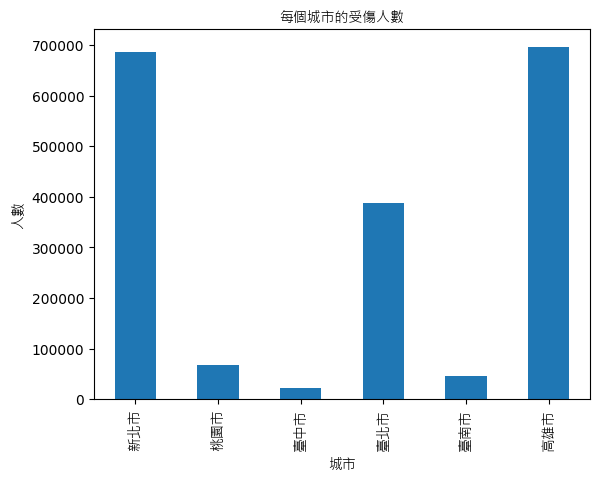

In [41]:
import matplotlib.pyplot as plt


# 設定中文字體路徑
font_path = 'C:/專題/微軟正黑體-1.ttf'  # 替換為中文字體的路徑

# 設定中文字體
font_prop = font_manager.FontProperties(fname=font_path)

# 使用 groupby 計算每個城市的死亡與受傷人數
city_counts = df.groupby('CITY')['ACCIDENT_INJURY'].sum()

# 繪製長條圖
fig, ax = plt.subplots()
city_counts.plot(kind='bar', ax=ax)

# 設定圖表標題和軸標籤
ax.set_title('每個城市的受傷人數', fontproperties=font_prop)
ax.set_xlabel('城市', fontproperties=font_prop)
ax.set_ylabel('人數', fontproperties=font_prop)

# 設定 X 軸刻度標籤為中文
ax.set_xticklabels(city_counts.index, fontproperties=font_prop)

# 顯示圖表
plt.show()

C:\Users\student\AppData\Local\Temp\ipykernel_11552\3983437200.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(city_death_counts.columns, fontproperties=font_prop)


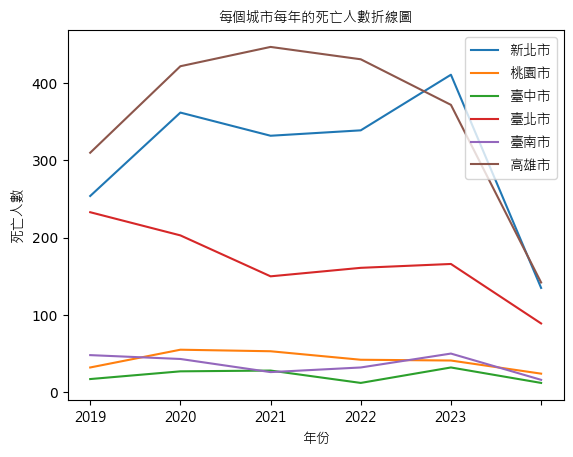

In [46]:
import matplotlib.pyplot as plt


# 設定中文字體路徑
font_path = 'C:/專題/微軟正黑體-1.ttf'  # 替換為中文字體的路徑

# 設定中文字體
font_prop = font_manager.FontProperties(fname=font_path)


# 將時間欄位轉換為年份
df['Year'] = pd.to_datetime(df['WHOLE_DATE']).dt.year

# 使用 groupby 計算每個城市每年的死亡人數
city_death_counts = df.groupby(['CITY', 'Year'])['ACCIDENT_DEAD'].sum().unstack()

# 繪製折線圖
fig, ax = plt.subplots()
for city in city_death_counts.index:
    ax.plot(city_death_counts.columns, city_death_counts.loc[city], label=city)

# 設定圖表標題和軸標籤
ax.set_title('每個城市每年的死亡人數折線圖', fontproperties=font_prop)
ax.set_xlabel('年份', fontproperties=font_prop)
ax.set_ylabel('死亡人數', fontproperties=font_prop)

# 添加圖例
ax.legend(prop=font_prop)

ax.set_xticklabels(city_death_counts.columns, fontproperties=font_prop)

# 顯示圖表
plt.show()


C:\Users\student\AppData\Local\Temp\ipykernel_11552\2802862581.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(city_death_counts.columns, fontproperties=font_prop)


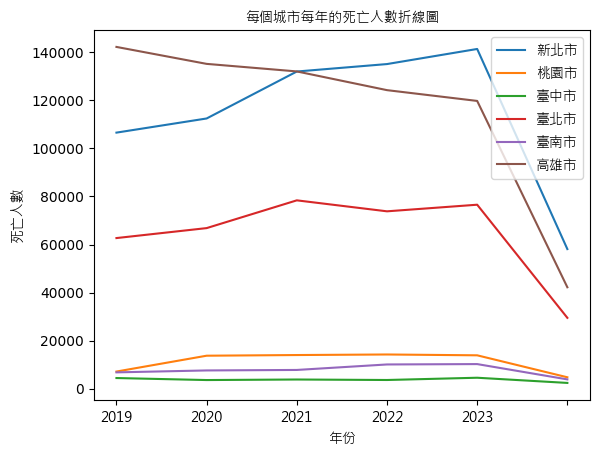

In [47]:
import matplotlib.pyplot as plt


# 設定中文字體路徑
font_path = 'C:/專題/微軟正黑體-1.ttf'  # 替換為中文字體的路徑

# 設定中文字體
font_prop = font_manager.FontProperties(fname=font_path)


# 將時間欄位轉換為年份
df['Year'] = pd.to_datetime(df['WHOLE_DATE']).dt.year

# 使用 groupby 計算每個城市每年的死亡人數
city_death_counts = df.groupby(['CITY', 'Year'])['ACCIDENT_INJURY'].sum().unstack()

# 繪製折線圖
fig, ax = plt.subplots()
for city in city_death_counts.index:
    ax.plot(city_death_counts.columns, city_death_counts.loc[city], label=city)

# 設定圖表標題和軸標籤
ax.set_title('每個城市每年的受傷人數折線圖', fontproperties=font_prop)
ax.set_xlabel('年份', fontproperties=font_prop)
ax.set_ylabel('死亡人數', fontproperties=font_prop)

# 添加圖例
ax.legend(prop=font_prop)

ax.set_xticklabels(city_death_counts.columns, fontproperties=font_prop)

# 顯示圖表
plt.show()


In [48]:
city_death_counts.columns

Index([2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='Year')